<a href="https://colab.research.google.com/github/rogerthatrob/Practice/blob/master/AI_Bootcamp_Prof__Oge_ML_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression 

This example (originally available [here](https://github.com/Benlau93/Machine-Learning-by-Andrew-Ng-in-Python)) is from Coursera's "Machine Learning" course by Andrew Ng.

### Loading of Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
files.upload()

Saving ex2data1.txt to ex2data1.txt


{'ex2data1.txt': b'34.62365962451697,78.0246928153624,0\n30.28671076822607,43.89499752400101,0\n35.84740876993872,72.90219802708364,0\n60.18259938620976,86.30855209546826,1\n79.0327360507101,75.3443764369103,1\n45.08327747668339,56.3163717815305,0\n61.10666453684766,96.51142588489624,1\n75.02474556738889,46.55401354116538,1\n76.09878670226257,87.42056971926803,1\n84.43281996120035,43.53339331072109,1\n95.86155507093572,38.22527805795094,0\n75.01365838958247,30.60326323428011,0\n82.30705337399482,76.48196330235604,1\n69.36458875970939,97.71869196188608,1\n39.53833914367223,76.03681085115882,0\n53.9710521485623,89.20735013750205,1\n69.07014406283025,52.74046973016765,1\n67.94685547711617,46.67857410673128,0\n70.66150955499435,92.92713789364831,1\n76.97878372747498,47.57596364975532,1\n67.37202754570876,42.83843832029179,0\n89.67677575072079,65.79936592745237,1\n50.534788289883,48.85581152764205,0\n34.21206097786789,44.20952859866288,0\n77.9240914545704,68.9723599933059,1\n62.271013670046

In [ ]:
df=pd.read_csv("ex2data1.txt",header=None)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [ ]:
df.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


### Plotting of Data

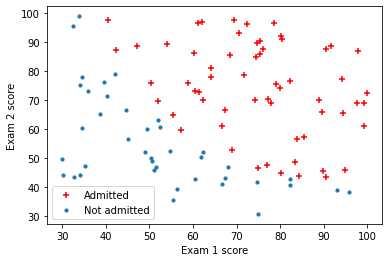

In [ ]:
pos , neg = (y==1).reshape(100,1) , (y==0).reshape(100,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",s=10)
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(["Admitted","Not admitted"],loc=0)

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """
    
    return 1/ (1 + np.exp(-z))

In [ ]:
# testing the sigmoid function
sigmoid(0)

0.5

### Compute the Cost Function and Gradient

$J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}log(h_{\Theta}(x^{(i)})) - (1 - y^{(i)})log(1 - (h_{\Theta}(x^{(i)}))]$

$ \frac{\partial J(\Theta)}{\partial \Theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\Theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$

In [ ]:
def costFunction(theta, X, y):
    """
    Takes in numpy array theta, x and y and return the logistic regression cost function and gradient
    """
    
    m=len(y)
    
    predictions = sigmoid(np.dot(X,theta))
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    
    grad = 1/m * np.dot(X.transpose(),(predictions - y))
    
    return cost[0] , grad

### Feature scaling

In [ ]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [ ]:
m , n = X.shape[0], X.shape[1]
X, X_mean, X_std = featureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y=y.reshape(m,1)
initial_theta = np.zeros((n+1,1))
cost, grad= costFunction(initial_theta,X,y)
print("Cost of initial theta is",cost)
print("Gradient at initial theta (zeros):",grad)

Cost of initial theta is 0.693147180559946
Gradient at initial theta (zeros): [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Gradient Descent

In [ ]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        cost, grad = costFunction(theta,X,y)
        theta = theta - (alpha * grad)
        J_history.append(cost)
    
    return theta , J_history

In [ ]:
theta , J_history = gradientDescent(X,y,initial_theta,1,400)

In [ ]:
print("Theta optimized by gradient descent:",theta)
print("The cost of the optimized theta:",J_history[-1])

Theta optimized by gradient descent: [[1.65947664]
 [3.8670477 ]
 [3.60347302]]
The cost of the optimized theta: 0.20360044248226664


### Plotting of Cost Function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

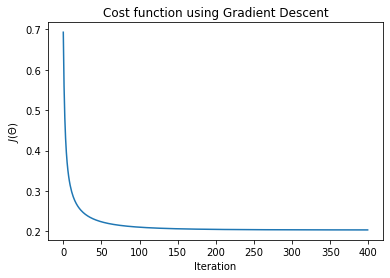

In [ ]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Plotting the decision boundary

From Machine Learning Resources:
    
$h_\Theta(x) = g(z)$, where g is the sigmoid function and $z = \Theta^Tx$

Since $h_\Theta(x) \geq 0.5$ is interpreted as predicting class "1", $g(\Theta^Tx) \geq 0.5$ or $\Theta^Tx \geq 0$ predict class "1" 

$\Theta_1 + \Theta_2x_2 + \Theta_3x_3 = 0$ is the decision boundary   

Since, we plot $x_2$ against $x_3$, the boundary line will be the equation $ x_3 = \frac{-(\Theta_1+\Theta_2x_2)}{\Theta_3}$

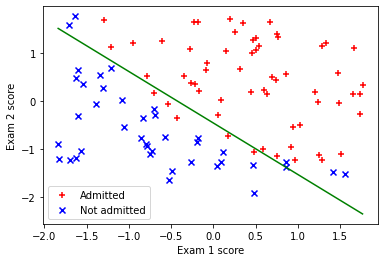

In [ ]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Admitted")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Not admitted")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])
y_value=-(theta[0] +theta[1]*x_value)/theta[2]
plt.plot(x_value,y_value, "g")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend(loc=0)

### Prediction

In [ ]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0

In [ ]:
score_1 = 5
score_2 = 85
x_test = np.array([score_1,score_2])
x_test = (x_test - X_mean)/X_std
x_test = np.append(np.ones(1),x_test)
prob = sigmoid(x_test.dot(theta))
print(f"For a student with scores {score_1} and {score_2}, we predict an admission probability of",prob[0])

For a student with scores 5 and 85, we predict an admission probability of 0.0011194893440433578


### Accuracy on training set 

In [ ]:
p=classifierPredict(theta,X)
print("Train Accuracy:", sum(p==y)[0],"%")

Train Accuracy: 89 %
